# Phase1: Predicting Model

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

In [2]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Wrangling

In [5]:
# Null Values
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Diabetes Case Indicator
**"Diabetes Test Result"** is revealed in data["Diabetes_012"] column by following values:
<br> *0 :"No_Diabetes", 1:"Pre_Diabetes", 2:"Diabetes"

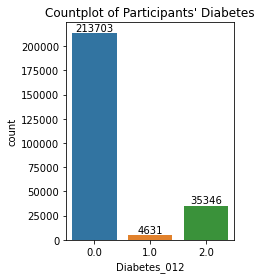

In [7]:
# Diabetes vs PreDiabetes cases
Q = "Diabetes_012"
df0 = data


plt.figure(figsize = (3 , 4))
ax = sns.countplot(x=df0[Q], data = df0)
plt.title("Countplot of Participants' Diabetes")

for i in ax.containers:
    ax.bar_label(i,),

**Conclusion**: AS this was found we have a districted imbalanced values for Diabetes results. This fact leads our case study and define who to treat with our challenge.
Action: To prevent the complexities of imblanced data, it shall be necessary to consider all Pre_Diabetes to Diabetes cases in on basket as Diabetes. (In Logistic Regression, regarding the weak predicting performace of model, I make this decision.) so all Diabetes and Pre_Diabetes cases will be taken in one cases.

In [8]:
# deleting prediabetes 
data.Diabetes_012[data.Diabetes_012 == 2] = 1
data.Diabetes_012.unique()

array([0., 1.])

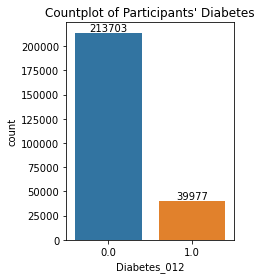

In [9]:
plt.figure(figsize = (3 , 4))
ax = sns.countplot(x=df0[Q], data = df0)
plt.title("Countplot of Participants' Diabetes")

for i in ax.containers:
    ax.bar_label(i,),

# Correlation between diabetes and other parameters

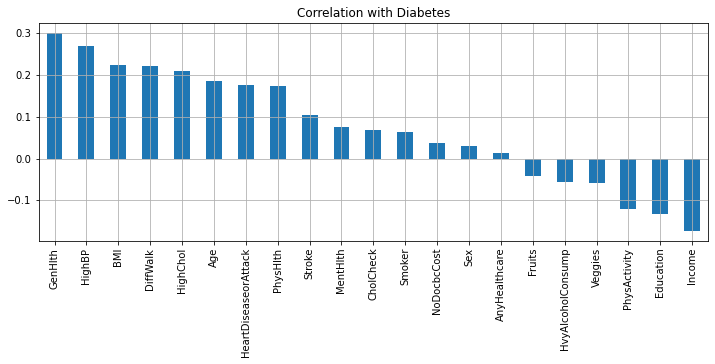

In [10]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12, 4)
, title="Correlation with Diabetes");
#df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False)

I stole the above correlation graph from your notebook! It is excellent.

Because the massive difference between Income in US and other countries (*including Iran*), among these parameters **Income** is going to be dropped.

In [11]:
data = data.drop('Income', axis = 1)

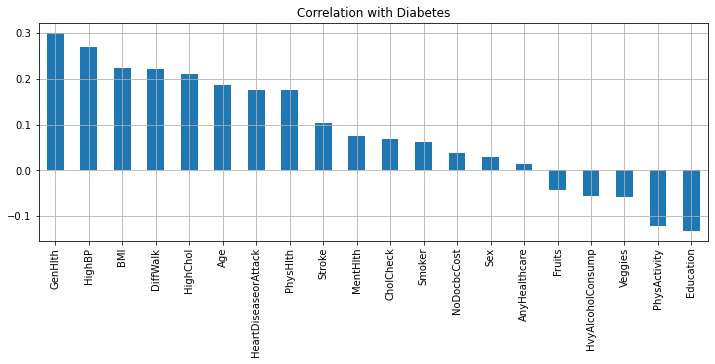

In [12]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12, 4)
, title="Correlation with Diabetes");
#df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False)

## Training Model
The **LGBMClassifier** had one of the best performances among all applyed methods. so this model will be selected as classifier for this projecs.

In [13]:
x = data.drop('Diabetes_012', axis = 1)
y = data['Diabetes_012']

In [14]:
from sklearn.model_selection import train_test_split

x_train,xx,y_train,yy = train_test_split(x,y,test_size = 0.8,random_state = 23) 
#x_test,x_val,y_test,y_val = train_test_split(xx,yy,test_size = 0.5,random_state = 23) 

In [15]:
clf = lgb.LGBMClassifier(boosting_type= 'gbdt', objective = 'binary',learning_rate= 0.07, n_estimators= 4000, reg_lambda = 2, 
                         max_depth = 5 , num_leaves = 20)
clf.fit(x_train,y_train)
train_predict = clf.predict(x_train)
print (metrics.accuracy_score(y_train,train_predict))

0.8994008199306213


In [16]:
# Accuracy Score of model
test_predict = clf.predict(xx)
print (metrics.accuracy_score(yy,test_predict))

0.842493495742668


In [17]:
# important features
im = clf.feature_importances_
col = np.array(x.columns)

dd = pd.DataFrame(im, columns=['importance'])
dd.insert(1 , 'feature name', value = col)
dd.sort_values(by = 'importance', ascending=False, inplace = True)
dd

,importance,feature name
3,16134,BMI
18,9041,Age
15,8679,PhysHlth
14,7202,MentHlth
19,5428,Education
13,4849,GenHlth
7,2201,PhysActivity
4,2043,Smoker
8,1901,Fruits
1,1898,HighChol


# Phase 2: Communication Algirithm

In [18]:
data['Label'] = ["USA"] * len(data)

In [19]:
data['Date'] = ["2015"] * len(data)

In [20]:
data.to_csv('export_diabet.csv', index=False, header=True)

In [21]:
label = "Capchered_site"

In [22]:
from datetime import datetime

# datetime object containing current date and time
dt_string=datetime.now()
#dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 2022-12-11 20:43:44.241804


In [24]:
HighBP = input(print("Do you have High Blood Pressure? (Yes/No)"))


HighBP =  list(HighBP)[0].lower()


if HighBP != "y" and "yes":
    if HighBP != "n" and "no":
        print("Wrong value! please enter yes or no")
        HighBP = input(print("Do you have High Blood Pressure? (Yes/No)"))
    elif HighBP == "n":
        HighBP = 0
elif HighBP == "y":
    HighBP = 1

Do you have High Blood Pressure? (Yes/No)
Nonen


In [25]:
HighBP

0

In [26]:
HighChol = input(print("Do you have High Blood cholesterol? (Yes/No)"))


HighChol =  list(HighChol)[0].lower()


if HighChol != "y" and "yes":
    if HighChol != "n" and "no":
        print("Wrong value! please enter yes or no")
        HighChol = input(print("Do you have High Blood cholesterol? (Yes/No)"))
    elif HighChol == "n":
        HighChol =0
elif HighChol == "y":
    HighChol = 1

Do you have High Blood cholesterol? (Yes/No)
Nonen


In [27]:
HighChol

0

In [28]:
CholCheck = input(print("Do you check within  Cholesterol past five years? (Yes/No)"))


CholCheck =  list(CholCheck)[0].lower()


if CholCheck != "y" and "yes":
    if CholCheck != "n" and "no":
        print("Wrong value! please enter yes or no")
        CholCheck = input(print("Do you check within  Cholesterol past five years? (Yes/No)"))
    elif CholCheck == "n":
        CholCheck =0
elif CholCheck == "y":
    CholCheck = 1

Do you check within  Cholesterol past five years? (Yes/No)
Nonen


In [29]:
CholCheck

0

In [77]:
BMI = int(input(print("What is your Body Mass Index? (5..100)")))


if ( BMI < 5) or (BMI > 100):
        print("Wrong value! please enter your BMI")
        BMI = input(print("What is your Body Mass Index? (5..100)"))
else:
#elif (BMI>'5') or (BMI<='100'):
    BMI = int(BMI)

What is your Body Mass Index? (5..100)
None27


In [78]:
BMI

27

In [79]:
Smoker = input(print("Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (Yes/No)"))


Smoker =  list(Smoker)[0].lower()


if Smoker != "y" and "yes":
    if Smoker != "n" and "no":
        print("Wrong value! please enter yes or no")
        Smoker = input(print("Have you smoked at least 100 cigarettes in your entire life? (Yes/No)"))
    elif Smoker == "n":
        Smoker =0
elif Smoker == "y":
    Smoker = 1

Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (Yes/No)
Nonen


In [80]:
Smoker

0

In [81]:
Stroke = input(print("Did you have a stroke? (Yes/No)"))


Stroke =  list(Stroke)[0].lower()


if Stroke != "y" and "yes":
    if Stroke != "n" and "no":
        print("Wrong value! please enter yes or no")
        Stroke = input(print("you had a stroke? (Yes/No)"))
    elif Stroke == "n":
        Stroke =0
elif Stroke == "y":
    Stroke = 1 

Did you have a stroke? (Yes/No)
Nonen


In [82]:
Stroke

0

In [83]:
HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))


HeartDiseaseorAttack =  list(HeartDiseaseorAttack)[0].lower()


if HeartDiseaseorAttack != "y" and "yes":
    if HeartDiseaseorAttack != "n" and "no":
        print("Wrong value! please enter yes or no")
        HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))
    elif HeartDiseaseorAttack == "n":
        HeartDiseaseorAttack =0
elif HeartDiseaseorAttack == "y":
    HeartDiseaseorAttack = 1 

Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)
Nonen


In [84]:
HeartDiseaseorAttack

0

In [85]:
PhysActivity = input(print("Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)"))


PhysActivity =  list(PhysActivity)[0].lower()


if PhysActivity != "y" and "yes":
    if PhysActivity != "n" and "no":
        print("Wrong value! please enter yes or no")
        PhysActivity = input(print("Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)"))
    elif PhysActivity == "n":
        PhysActivity =0
elif PhysActivity == "y":
    PhysActivity = 1

Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)
Nonen


In [86]:
PhysActivity

0

In [87]:
Fruits = input(print("Consume Fruit 1 or more times per day? (Yes/No)"))

Fruits =  list(Fruits)[0].lower()
if Fruits != "y" and "yes":
    if Fruits != "n" and "no":
        print("Wrong value! please enter yes or no")
        Fruits = input(print("Consume Fruit 1 or more times per day? (Yes/No)"))
    elif Fruits == "n":
        Fruits =0
elif Fruits == "y":
    Fruits = 1 

Consume Fruit 1 or more times per day? (Yes/No)
Nonen


In [88]:
Fruits

0

In [89]:
Veggies = input(print("Consume Vegetables 1 or more times per day? (Yes/No)"))

Veggies =  list(Veggies)[0].lower()
if Veggies != "y" and "yes":
    if Veggies != "n" and "no":    
        print("Wrong value! please enter yes or no")
        Veggies = input(print("Consume Vegetables 1 or more times per day? (Yes/No)"))
    elif Veggies == "n":
        Veggies =0
elif Veggies == "y":
    Veggies = 1 

Consume Vegetables 1 or more times per day? (Yes/No)
Noney


In [90]:
Veggies

1

In [91]:
HvyAlcoholConsump = input(print("Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)"))

HvyAlcoholConsump =  list(HvyAlcoholConsump)[0].lower()
if HvyAlcoholConsump != "y" and "yes":
    if HvyAlcoholConsump != "n" and "no": 
        print("Wrong value! please enter yes or no")
        HvyAlcoholConsump = input(print("Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)"))
    elif HvyAlcoholConsump == "n":
        HvyAlcoholConsump =0
elif HvyAlcoholConsump == "y":
    HvyAlcoholConsump = 1 

Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)
Nonen


In [92]:
HvyAlcoholConsump

0

In [93]:
AnyHealthcare = input(print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)"))

AnyHealthcare =  list(AnyHealthcare)[0].lower()
if AnyHealthcare != "y" and "yes":
    if AnyHealthcare != "n" and "no": 
        print("Wrong value! please enter yes or no")
        AnyHealthcare = input(print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)"))
    elif AnyHealthcare == "n":
        AnyHealthcare =0
elif AnyHealthcare == "y":
    AnyHealthcare = 1

Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)
Noney


In [94]:
AnyHealthcare

1

In [95]:
NoDocbcCost = input(print("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)"))

NoDocbcCost =  list(NoDocbcCost)[0].lower()
if NoDocbcCost != "y" and "yes":
    if NoDocbcCost != "n" and "no": 
        print("Wrong value! please enter yes or no")
        NoDocbcCost = input(print("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)"))
    elif NoDocbcCost == "n":
        NoDocbcCost =0
elif NoDocbcCost == "y":
    NoDocbcCost = 1 

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)
Nonen


In [96]:
NoDocbcCost

0

In [97]:
GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)"))

if (GenHlth<'1') and (GenHlth>'5'):
    print("Wrong value! please enter yes or no")
    GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)"))
if (GenHlth<'1') and (GenHlth>'5'):
    print("Wrong value! please check!!!")
    GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (Please ENTER 1..5)"))
elif (GenHlth>'1') and (GenHlth<='5'):
    GenHlth = int(GenHlth)

 Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)
None3


In [98]:
GenHlth

3

In [99]:
MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (0..30)"))

if (MentHlth<'0') or (MentHlth>'30'):
    print("Wrong value! please enter yes or no")
    MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0LOW:0 ~ HIGH:30)? (0..30)"))
if (MentHlth<'0') or (MentHlth>'30'):
    print("Wrong value! please check!!!")
    MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (Please ENTER 0..30)"))
elif (MentHlth>'0') and (MentHlth<='30'):
    MentHlth = int(MentHlth)

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (0..30)
None10


In [100]:
MentHlth

10

In [101]:
PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)"))

if (PhysHlth<'0') or (PhysHlth>'30'):
    print("Wrong value! please enter yes or no")
    PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)"))
if (PhysHlth<'0') or (PhysHlth>'30'):
    print("Wrong value! please check!!!")
    PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (Please ENTER 0..30)"))
elif (PhysHlth>'0') and (PhysHlth<='30'):
    PhysHlth = int(PhysHlth)

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)
None10


In [102]:
PhysHlth

10

In [103]:
DiffWalk = input(print("Do you have serious difficulty walking or climbing stairs? (Yes/No)"))

DiffWalk =  list(DiffWalk)[0].lower()
if DiffWalk != "y" and "yes":
    if DiffWalk != "n" and "no": 
        print("Wrong value! please enter yes or no")
        DiffWalk = input(print("Do you have serious difficulty walking or climbing stairs? (Yes/No)"))
    elif DiffWalk == "n":
        DiffWalk =0
elif DiffWalk == "y":
    DiffWalk = 1 

Do you have serious difficulty walking or climbing stairs? (Yes/No)
Nonen


In [104]:
DiffWalk

0

In [106]:
Sex = input(print("Indicate sex of respondent (Female or Male)? (Female/Male)"))

Sex =  list(Sex)[0].lower()
if Sex != "m" and "male":
    if Sex != "f" and "female":
        print("Wrong value! please enter male or female")
        Sex = input(print("Indicate sex of respondent (Female or Male)? (Female/Male)"))
    elif Sex == "f":
        Sex =0
elif Sex == "m":
    Sex = 1 

Indicate sex of respondent (Female or Male)? (Female/Male)
Nonem


In [107]:
Sex

1

In [108]:
Age = input(print("please enter age"))

if (Age<'18'):
    print("Wrong value! please enter 18 years old and older")
    Age = input(print("Fourteen-level age category?"))
elif (Age>='18') and (Age<='24'):
    Age = 1
elif (Age>='25') and (Age<='29'):
    Age = 2
elif (Age>='30') and (Age<='34'):
    Age = 3
elif (Age>='35') and (Age<='39'):
    Age = 4
elif (Age>='40') and (Age<='44'):
    Age = 5
elif (Age>='45') and (Age<='49'):
    Age = 6
elif (Age>='50') and (Age<='54'):
    Age = 7
elif (Age>='55') and (Age<='59'):
    Age = 8
elif (Age>='60') and (Age<='64'):
    Age = 9
elif (Age>='65') and (Age<='69'):
    Age = 10
elif (Age>='70') and (Age<='74'):
    Age = 11
elif (Age>='75') and (Age<='79'):
    Age = 12
elif (Age>='80'):
    Age = 13

please enter age
None32


In [109]:
Age

3

In [110]:
Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)['Education'] == 1 => 'Bi Savad',['Education'] == 2 => 'Sikl,['Education'] == 3 => 'Diplom',['Education'] == 4 => 'Karshenasi',['Education'] == 5 => 'Karshenasi arshad',['Education'] == 6 => 'Doctora'? (1..6)"))

if (Education<'1') or (Education>'6'):
    print("Wrong value! please enter yes or no")
    Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)? (1..6)"))
if (Education<'1') or (Education>'6'):
    print("Wrong value! please check!!!")
    Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)? (Please ENTER 1..6)"))
elif (Education>'1') and (Education<='6'):
    Education = int(Education)

What is the highest grade or year of school you completed? (1 ~ 6)['Education'] == 1 => 'Bi Savad',['Education'] == 2 => 'Sikl,['Education'] == 3 => 'Diplom',['Education'] == 4 => 'Karshenasi',['Education'] == 5 => 'Karshenasi arshad',['Education'] == 6 => 'Doctora'? (1..6)
None4


In [111]:
Education

4

In [112]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Label',
       'Date'],
      dtype='object')

In [113]:
new_vector = [[HighBP, HighChol, CholCheck, BMI, Smoker,
       Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
       HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth,
       MentHlth, PhysHlth, DiffWalk, Sex, Age, Education]]

In [114]:
new_vector

[[0, 0, 0, 27, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 10, 10, 0, 1, 3, 4]]

In [115]:
Diabetes_Prediction = clf.predict(new_vector)
if Diabetes_Prediction == 2:
    result = "Positive"
else:
    result = "Negative"

In [117]:
print("Our model predicted that your diabetec result is: '{}'".format(result))
print("Number of participants of in this survaytion = {}\nThe accuracy of model is:  84%".format(len(data)))

Our model predicted that your diabetec result is: 'Negative'
Number of participants of in this survaytion = 253680
The accuracy of model is:  84%


In [119]:
data0 = data[data["Age"]==Age]
data0

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Label,Date
91,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,5.0,0.0,0.0,0.0,3.0,6.0,USA,2015
96,1.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,...,1.0,4.0,0.0,3.0,0.0,0.0,3.0,5.0,USA,2015
115,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,3.0,30.0,30.0,1.0,1.0,3.0,5.0,USA,2015
319,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,3.0,0.0,0.0,3.0,5.0,USA,2015
404,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,USA,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253645,0.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,1.0,3.0,2.0,USA,2015
253654,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,1.0,3.0,3.0,USA,2015
253658,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,USA,2015
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,USA,2015


In [121]:
pd.crosstab(data0.Age,data0.Diabetes_012)

Diabetes_012,0.0,1.0
Age,,
3.0,10737,386


In [157]:
from collections import Counter
Counter(data0.Diabetes_012)

Counter({0.0: 10737, 1.0: 386})

In [120]:
pd.crosstab(data0.Age,data0.HighBP)

HighBP,0.0,1.0
Age,,
3.0,9487,1636


In [124]:
pd.crosstab(data0.Age,data0.HighChol)

HighChol,0.0,1.0
Age,,
3.0,9295,1828


In [125]:
pd.crosstab(data0.Age,data0.CholCheck)

CholCheck,0.0,1.0
Age,,
3.0,797,10326


In [126]:
pd.crosstab(data0.Age,data0.BMI)

BMI,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,...,79.0,81.0,82.0,84.0,87.0,88.0,89.0,92.0,95.0,98.0
Age,,,,,,,,,,,,,,,,,,,,,
3.0,1,1,4,13,24,92,205,386,499,734,...,4,5,4,9,9,1,4,2,2,1


In [127]:
pd.crosstab(data0.Age,data0.Smoker)

Smoker,0.0,1.0
Age,,
3.0,6919,4204


In [128]:
pd.crosstab(data0.Age,data0.Stroke)

Stroke,0.0,1.0
Age,,
3.0,11040,83


In [129]:
pd.crosstab(data0.Age,data0.HeartDiseaseorAttack)

HeartDiseaseorAttack,0.0,1.0
Age,,
3.0,10997,126


In [130]:
pd.crosstab(data0.Age,data0.PhysActivity)

PhysActivity,0.0,1.0
Age,,
3.0,1952,9171


In [131]:
pd.crosstab(data0.Age,data0.Fruits)

Fruits,0.0,1.0
Age,,
3.0,4164,6959


In [132]:
pd.crosstab(data0.Age,data0.Veggies)

Veggies,0.0,1.0
Age,,
3.0,1847,9276


In [133]:
pd.crosstab(data0.Age,data0.HvyAlcoholConsump)

HvyAlcoholConsump,0.0,1.0
Age,,
3.0,10445,678


In [134]:
pd.crosstab(data0.Age,data0.AnyHealthcare)

AnyHealthcare,0.0,1.0
Age,,
3.0,1060,10063


In [135]:
pd.crosstab(data0.Age,data0.NoDocbcCost)

NoDocbcCost,0.0,1.0
Age,,
3.0,9694,1429


In [136]:
pd.crosstab(data0.Age,data0.GenHlth)

GenHlth,1.0,2.0,3.0,4.0,5.0
Age,,,,,
3.0,2688,4468,2992,807,168


In [137]:
pd.crosstab(data0.Age,data0.MentHlth)

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,20.0,21.0,22.0,23.0,25.0,26.0,27.0,28.0,29.0,30.0
Age,,,,,,,,,,,,,,,,,,,,,
3.0,6604,554,760,459,221,579,41,234,42,5,...,184,13,4,1,61,3,3,18,7,561


In [138]:
pd.crosstab(data0.Age,data0.PhysHlth)

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Age,,,,,,,,,,,,,,,,,,,,,
3.0,7452,729,797,391,213,277,50,229,32,8,...,21,2,1,2,26,1,2,10,1,355


In [139]:
pd.crosstab(data0.Age,data0.DiffWalk)

DiffWalk,0.0,1.0
Age,,
3.0,10664,459


In [140]:
pd.crosstab(data0.Age,data0.Sex)

Sex,0.0,1.0
Age,,
3.0,6062,5061


In [141]:
pd.crosstab(data0.Age,data0.Education)

Education,1.0,2.0,3.0,4.0,5.0,6.0
Age,,,,,,
3.0,7,106,373,2018,3012,5607
